In [3]:
# src_vocab[ich]
# for n in sentences[0].split():
#   print(src_vocab[n])

input_batch = [[src_vocab[n] for n in sentences[0].split()]]
input_batch

[[1, 2, 3, 4, 0]]

In [2]:
def make_batch(sentences):
    input_batch = [[src_vocab[n] for n in sentences[0].split()]]
    output_batch = [[tgt_vocab[n] for n in sentences[1].split()]]
    target_batch = [[tgt_vocab[n] for n in sentences[2].split()]]
    return Variable(torch.LongTensor(input_batch)), Variable(torch.LongTensor(output_batch)), Variable(torch.LongTensor(target_batch))

make_batch(sentences)

(tensor([[1, 2, 3, 4, 0]]),
 tensor([[5, 1, 2, 3, 4]]),
 tensor([[1, 2, 3, 4, 6]]))

In [4]:
enc_inputs, dec_inputs, target_batch = make_batch(sentences)
print('Encoder input  ', enc_inputs)

Encoder input   tensor([[1, 2, 3, 4, 0]])


In [6]:
def get_attn_key_pad_mask(seq_k,     seq_q):
# to mask the padding size of the sequence k
    len_q = seq_q.size(1) #
    padding_mask = seq_k.eq(0)
    padding_mask = padding_mask.unsqueeze(1).expand(-1, len_q, -1)
    return padding_mask

get_attn_key_pad_mask(enc_inputs, enc_inputs)

tensor([[[0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1]]], dtype=torch.uint8)

In [11]:
padding_mask = enc_inputs.eq(0)
print(padding_mask)
padding_mask = padding_mask.unsqueeze(1)#.expand(-1, 5, -1)
print(padding_mask)

tensor([[0, 0, 0, 0, 1]], dtype=torch.uint8)
tensor([[[0, 0, 0, 0, 1]]], dtype=torch.uint8)


In [5]:
a = enc_inputs.data.eq(0)
a
a.expand(1, 5, 5)

tensor([[[0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1]]], dtype=torch.uint8)

In [ ]:
def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # batch_size x 1 x len_k(=len_q), one is masking
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k


In [18]:
print(enc_inputs)
le = enc_inputs.size(1)
padding_mask = enc_inputs.eq(0)
print(padding_mask)

tensor([[1, 2, 3, 4, 0]])
tensor([[0, 0, 0, 0, 1]], dtype=torch.uint8)


In [23]:
def get_pad_mask(seq):
    assert seq.dim() == 2
    return seq.ne(0).type(torch.float).unsqueeze(-1)
get_pad_mask(enc_inputs)
#print(enc_inputs.dim())

tensor([[[1.],
         [1.],
         [1.],
         [1.],
         [0.]]])

In [16]:
shape = [5,5]
sub_mask = np.triu(np.ones(shape), k=1)
print(sub_mask)
mask = torch.from_numpy(sub_mask).byte()
print(mask)

[[0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]
tensor([[0, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0]], dtype=torch.uint8)


In [11]:
print(bat)
print(lq)
print(dec_inputs)

1
5
tensor([[5, 1, 2, 3, 4]])


In [12]:
enc_inputs.data.eq(0)

tensor([[0, 0, 0, 0, 1]], dtype=torch.uint8)

In [48]:
new = get_attn_pad_mask(enc_inputs, enc_inputs)
print(new)
hey = get_attn_pad_mask(dec_inputs, dec_inputs)
print('\n', hey)

tensor([[[0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1]]], dtype=torch.uint8)

 tensor([[[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]]], dtype=torch.uint8)


In [75]:
def get_attn_subsequent_mask(seq):
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    subsequent_mask = np.triu(np.ones(attn_shape), k=1)
    subsequent_mask = torch.from_numpy(subsequent_mask).byte()
    return subsequent_mask
  
get_attn_subsequent_mask(dec_inputs)

tensor([[[0, 1, 1, 1, 1],
         [0, 0, 1, 1, 1],
         [0, 0, 0, 1, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0]]], dtype=torch.uint8)

In [73]:
import numpy as np
a = np.triu(np.ones((1,5,5)), k=1)
print(a)
b = torch.from_numpy(a).byte()
b

[[[0. 1. 1. 1. 1.]
  [0. 0. 1. 1. 1.]
  [0. 0. 0. 1. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0.]]]


tensor([[[0, 1, 1, 1, 1],
         [0, 0, 1, 1, 1],
         [0, 0, 0, 1, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0]]], dtype=torch.uint8)

In [47]:
few = get_attn_subsequent_mask(dec_inputs)
few

tensor([[[0, 1, 1, 1, 1],
         [0, 0, 1, 1, 1],
         [0, 0, 0, 1, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0]]], dtype=torch.uint8)

In [29]:
posistion = 5
n_posistion = 5
d_model = 10

def cal_angle(position, hid_idx):
    return position / np.power(10000, 2 * (hid_idx // 2) / d_model)


def get_posi_angle_vec(position):
    return [cal_angle(position, hid_j) for hid_j in range(d_model)]


print(cal_angle(5, 60))
get_posi_angle_vec(5)

5e-24


[5.0,
 5.0,
 0.7924465962305566,
 0.7924465962305566,
 0.12559432157547898,
 0.12559432157547898,
 0.019905358527674867,
 0.019905358527674867,
 0.003154786722400965,
 0.003154786722400965]

In [2]:
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores : [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn

In [ ]:
def get_sinusoid_encoding_table(n_position, d_model):
    def cal_angle(position, hid_idx):
        return position / np.power(10000, 2 * (hid_idx // 2) / d_model)
      
    def get_posi_angle_vec(position):
        return [cal_angle(position, hid_j) for hid_j in range(d_model)]
      
    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1
    return torch.FloatTensor(sinusoid_table)

  
a = get_sinusoid_encoding_table(5, 512)

In [28]:
sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(80)])
sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])
print(sinusoid_table)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  5.40302306e-01  9.64661620e-01 ...  9.99999994e-01
   1.03663293e-04  9.99999995e-01]
 [ 2.00000000e+00 -4.16146837e-01  1.92932324e+00 ...  9.99999977e-01
   2.07326586e-04  9.99999979e-01]
 ...
 [ 7.70000000e+01 -3.09750317e-02  7.42789447e+01 ...  9.99965767e-01
   7.98207355e-03  9.99968143e-01]
 [ 7.80000000e+01 -8.57803093e-01  7.52436064e+01 ...  9.99964872e-01
   8.08573684e-03  9.99967311e-01]
 [ 7.90000000e+01 -8.95970947e-01  7.62082680e+01 ...  9.99963965e-01
   8.18940013e-03  9.99966467e-01]]


In [2]:
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
    def forward(self, Q, K, V, attn_mask):
        # q: [batch_size x len_q x d_model], k: [batch_size x len_k x d_model], v: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size x n_heads x len_q x len_k]

        # context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = nn.Linear(n_heads * d_v, d_model)(context)
        return nn.LayerNorm(d_model)(output + residual), attn # output: [batch_size x len_q x d_model]


In [5]:
a= MultiHeadAttention(enc_inputs, enc_inputs, enc_inputs, None)

TypeError: __init__() takes 1 positional argument but 5 were given

Epoch: 0001 cost = 2.019113
Epoch: 0002 cost = 0.269599
Epoch: 0003 cost = 0.732250
Epoch: 0004 cost = 0.123361
Epoch: 0005 cost = 0.240645
Epoch: 0006 cost = 0.008461
Epoch: 0007 cost = 0.021096
Epoch: 0008 cost = 0.026800
Epoch: 0009 cost = 0.001937
Epoch: 0010 cost = 0.004960
Epoch: 0011 cost = 0.005663
Epoch: 0012 cost = 0.003651
Epoch: 0013 cost = 0.019557
Epoch: 0014 cost = 0.004512
Epoch: 0015 cost = 0.012752
Epoch: 0016 cost = 0.001018
Epoch: 0017 cost = 0.000684
Epoch: 0018 cost = 0.000541
Epoch: 0019 cost = 0.000567
Epoch: 0020 cost = 0.002010
ich mochte ein bier P -> ['i', 'want', 'a', 'beer', 'E']
first head of last state enc_self_attns


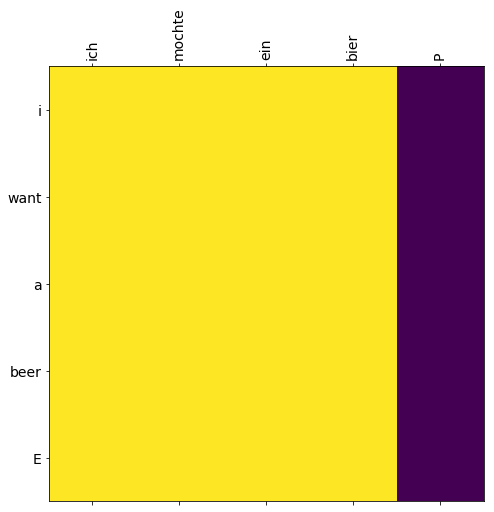

first head of last state dec_self_attns


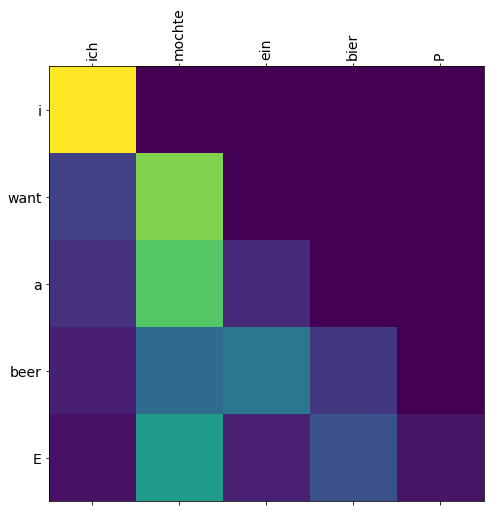

first head of last state dec_enc_attns


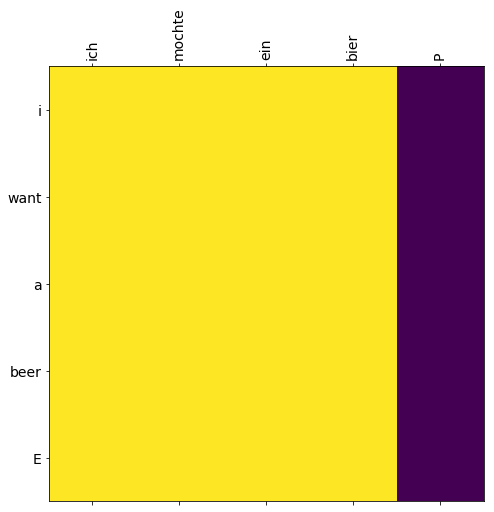

In [1]:
'''
  code by Tae Hwan Jung(Jeff Jung) @graykode, Derek Miller @dmmiller612
  Reference : https://github.com/jadore801120/attention-is-all-you-need-pytorch
              https://github.com/JayParks/transformer
'''

%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

dtype = torch.FloatTensor
# S: Symbol that shows starting of decoding input
# E: Symbol that shows starting of decoding output
# P: Symbol that will fill in blank sequence if current batch data size is short than time steps
sentences = ['ich mochte ein bier P', 'S i want a beer', 'i want a beer E']
# Transformer Parameters
# Padding Should be Zero
src_vocab = {'P' : 0, 'ich' : 1, 'mochte' : 2, 'ein' : 3, 'bier' : 4}
src_vocab_size = len(src_vocab)

tgt_vocab = {'P' : 0, 'i' : 1, 'want' : 2, 'a' : 3, 'beer' : 4, 'S' : 5, 'E' : 6}
number_dict = {i: w for i, w in enumerate(tgt_vocab)}
tgt_vocab_size = len(tgt_vocab)

src_len = 5
tgt_len = 5

d_model = 512  # Embedding Size
d_ff = 2048 # FeedForward dimension
d_k = d_v = 64  # dimension of K(=Q), V
n_layers = 6  # number of Encoder of Decoder Layer
n_heads = 8  # number of heads in Multi-Head Attention



def make_batch(sentences):
    input_batch = [[src_vocab[n] for n in sentences[0].split()]]
    output_batch = [[tgt_vocab[n] for n in sentences[1].split()]]
    target_batch = [[tgt_vocab[n] for n in sentences[2].split()]]
    return Variable(torch.LongTensor(input_batch)), Variable(torch.LongTensor(output_batch)), Variable(torch.LongTensor(target_batch))

  
  
def get_sinusoid_encoding_table(n_position, d_model):
    def cal_angle(position, hid_idx):
        return position / np.power(10000, 2 * (hid_idx // 2) / d_model)
      
    def get_posi_angle_vec(position):
        return [cal_angle(position, hid_j) for hid_j in range(d_model)]
      
    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1
    return torch.FloatTensor(sinusoid_table)

  
  
  
def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token
    pad_attn_mask = seq_k.data.eq(0).unsqueeze(1)  # batch_size x 1 x len_k(=len_q), one is masking
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k

  
  
  
def get_attn_subsequent_mask(seq):
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    subsequent_mask = np.triu(np.ones(attn_shape), k=1)
    subsequent_mask = torch.from_numpy(subsequent_mask).byte()
    return subsequent_mask

  
####################### COMPLETED UPTO THIS #####################  
  
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k) # scores : [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        scores.masked_fill_(attn_mask, -1e9) # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn

  
  
  
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
    def forward(self, Q, K, V, attn_mask):
        # q: [batch_size x len_q x d_model], k: [batch_size x len_k x d_model], v: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)
        q_s = self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1,2)  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1,2)  # v_s: [batch_size x n_heads x len_k x d_v]

        attn_mask = attn_mask.unsqueeze(1).repeat(1, n_heads, 1, 1) # attn_mask : [batch_size x n_heads x len_q x len_k]

        # context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q(=len_k) x len_k(=len_q)]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v) # context: [batch_size x len_q x n_heads * d_v]
        output = nn.Linear(n_heads * d_v, d_model)(context)
        return nn.LayerNorm(d_model)(output + residual), attn # output: [batch_size x len_q x d_model]

  
  
  
class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)

    def forward(self, inputs):
        residual = inputs # inputs : [batch_size, len_q, d_model]
        output = nn.ReLU()(self.conv1(inputs.transpose(1, 2)))
        output = self.conv2(output).transpose(1, 2)
        return nn.LayerNorm(d_model)(output + residual)

  
  
  
class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()# into the attention network
        self.pos_ffn = PoswiseFeedForwardNet()# then into the feed forward network

    def forward(self, enc_inputs, enc_self_attn_mask):
        enc_outputs, attn = self.enc_self_attn(enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask) # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(enc_outputs) # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn

  
  
  
class DecoderLayer(nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention()
        self.dec_enc_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        dec_outputs, dec_self_attn = self.dec_self_attn(dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask)
        dec_outputs, dec_enc_attn = self.dec_enc_attn(dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask)
        dec_outputs = self.pos_ffn(dec_outputs)
        return dec_outputs, dec_self_attn, dec_enc_attn

  
  
  
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.src_emb = nn.Embedding(src_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(src_vocab_size, d_model),freeze=True)
        self.layers = nn.ModuleList([EncoderLayer() for _ in range(n_layers)])

    def forward(self, enc_inputs): # enc_inputs : [batch_size x source_len]
        enc_outputs = self.src_emb(enc_inputs) + self.pos_emb(torch.LongTensor([[1,2,3,4,0]]))
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs)
        enc_self_attns = []
        for layer in self.layers:
            enc_outputs, enc_self_attn = layer(enc_outputs, enc_self_attn_mask)
            enc_self_attns.append(enc_self_attn)
        return enc_outputs, enc_self_attns

  
  
  
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.tgt_emb = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_emb = nn.Embedding.from_pretrained(get_sinusoid_encoding_table(tgt_vocab_size, d_model),freeze=True)
        self.layers = nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(self, dec_inputs, enc_inputs, enc_outputs): # dec_inputs : [batch_size x target_len]
        dec_outputs = self.tgt_emb(dec_inputs) + self.pos_emb(torch.LongTensor([[5,1,2,3,4]]))
        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs)
        dec_self_attn_subsequent_mask = get_attn_subsequent_mask(dec_inputs)
        dec_self_attn_mask = torch.gt((dec_self_attn_pad_mask + dec_self_attn_subsequent_mask), 0)

        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs)

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            dec_outputs, dec_self_attn, dec_enc_attn = layer(dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask)
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns

  
  
  
class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        self.projection = nn.Linear(d_model, tgt_vocab_size, bias=False)
    def forward(self, enc_inputs, dec_inputs):
        enc_outputs, enc_self_attns = self.encoder(enc_inputs)
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(dec_inputs, enc_inputs, enc_outputs)
        dec_logits = self.projection(dec_outputs) # dec_logits : [batch_size x src_vocab_size x tgt_vocab_size]
        return dec_logits.view(-1, dec_logits.size(-1)), enc_self_attns, dec_self_attns, dec_enc_attns

model = Transformer()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

  
  
  
def showgraph(attn):
    attn = attn[-1].squeeze(0)[0]
    attn = attn.squeeze(0).data.numpy()
    fig = plt.figure(figsize=(n_heads, n_heads)) # [n_heads, n_heads]
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attn, cmap='viridis')
    ax.set_xticklabels(['']+sentences[0].split(), fontdict={'fontsize': 14}, rotation=90)
    ax.set_yticklabels(['']+sentences[2].split(), fontdict={'fontsize': 14})
    plt.show()

  
  
  
for epoch in range(20):
    optimizer.zero_grad()
    enc_inputs, dec_inputs, target_batch = make_batch(sentences)
    outputs, enc_self_attns, dec_self_attns, dec_enc_attns = model(enc_inputs, dec_inputs)
    loss = criterion(outputs, target_batch.contiguous().view(-1))
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
    loss.backward()
    optimizer.step()

  
  
  
# Test
predict, _, _, _ = model(enc_inputs, dec_inputs)
predict = predict.data.max(1, keepdim=True)[1]
print(sentences[0], '->', [number_dict[n.item()] for n in predict.squeeze()])

print('first head of last state enc_self_attns')
showgraph(enc_self_attns)

print('first head of last state dec_self_attns')
showgraph(dec_self_attns)

print('first head of last state dec_enc_attns')
showgraph(dec_enc_attns)
